In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df = df[~df.duplicated()]

In [8]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


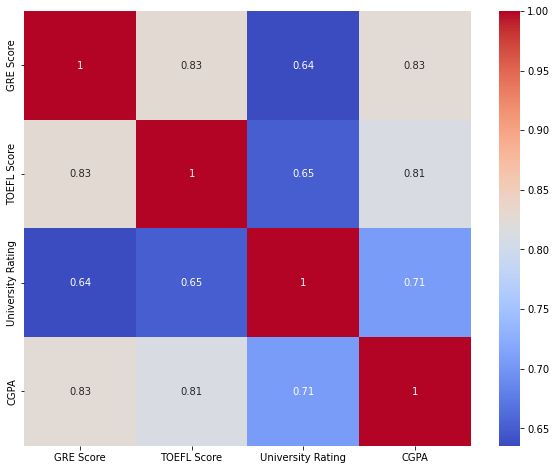

In [18]:
cols=['GRE Score','TOEFL Score','University Rating','CGPA']
plt.figure(figsize=(10, 8))
corr = df[cols].corr()
sns.heatmap(data= corr, annot=True, cmap='coolwarm')
plt.show()

In [20]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [22]:
df.fillna(df.mean(), inplace=True)

In [24]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [30]:
X = df.drop('Chance of Admit ', axis=1)
Y = df['Chance of Admit ']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=14)

In [32]:
modelLinear = LinearRegression()
modelLinear.fit(X_train, Y_train)

LinearRegression()

In [33]:
y_pred = modelLinear.predict(X_test)

In [38]:
mean_squared_error(Y_test, y_pred)

0.0030496549340956487

In [41]:
r2_score(Y_test, y_pred)

0.8516411031299062

In [45]:
df.loc[df["Chance of Admit "] >= 0, "Chance Labels"] = 'Not Admitted' 
df.loc[df["Chance of Admit "] >= 0.5, "Chance Labels"] = 'Might get Admitted' 
df.loc[df["Chance of Admit "] >= 0.85, "Chance Labels"] = 'Admitted' 

In [49]:
allChance = df['Chance Labels'].unique()
chanceSubsets = {}

for chance in allChance:
    chanceSubsets[chance] = df[df['Chance Labels'] == chance]

In [50]:
chanceSubsets.keys()

dict_keys(['Admitted', 'Might get Admitted', 'Not Admitted'])

In [52]:
merged = pd.concat([chanceSubsets['Admitted'], chanceSubsets['Might get Admitted'], chanceSubsets['Not Admitted']])

In [53]:
merged

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance Labels
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Admitted
5,6,330,115,5,4.5,3.0,9.34,1,0.90,Admitted
22,23,328,116,5,5.0,5.0,9.50,1,0.94,Admitted
23,24,334,119,5,5.0,4.5,9.70,1,0.95,Admitted
24,25,336,119,5,4.0,3.5,9.80,1,0.97,Admitted
...,...,...,...,...,...,...,...,...,...,...
388,389,296,97,2,1.5,2.0,7.80,0,0.49,Not Admitted
413,414,317,101,3,3.0,2.0,7.94,1,0.49,Not Admitted
420,421,299,100,3,2.0,3.0,7.42,0,0.42,Not Admitted
457,458,295,99,1,2.0,1.5,7.57,0,0.37,Not Admitted


In [56]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating']
sortedDfs = {}
for col in cols:
    sortedDfs[col] = df.sort_values(by= col)

In [57]:
sortedDfs['GRE Score']

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance Labels
377,378,290,100,1,1.5,2.0,7.56,0,0.47,Not Admitted
117,118,290,104,4,2.0,2.5,7.46,0,0.45,Not Admitted
168,169,293,97,2,2.0,4.0,7.80,1,0.64,Might get Admitted
79,80,294,93,1,1.5,2.0,7.36,0,0.46,Not Admitted
272,273,294,95,1,1.5,1.5,7.64,0,0.49,Not Admitted
...,...,...,...,...,...,...,...,...,...,...
81,82,340,120,4,5.0,5.0,9.50,1,0.96,Admitted
84,85,340,115,5,4.5,4.5,9.45,1,0.94,Admitted
143,144,340,120,4,4.5,4.0,9.92,1,0.97,Admitted
384,385,340,113,4,5.0,5.0,9.74,1,0.96,Admitted


In [58]:
transposed = df.T

In [59]:
transposed

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Serial No.,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
GRE Score,337,324,316,322,314,330,321,308,302,323,...,307,297,298,300,301,332,337,330,312,327
TOEFL Score,118,107,104,110,103,115,109,101,102,108,...,105,99,101,95,99,108,117,120,103,113
University Rating,4,4,3,3,2,5,3,2,1,3,...,2,4,4,2,3,5,5,5,4,4
SOP,4.5,4.0,3.0,3.5,2.0,4.5,3.0,3.0,2.0,3.5,...,2.5,3.0,2.5,3.0,2.5,4.5,5.0,4.5,4.0,4.5
LOR,4.5,4.5,3.5,2.5,3.0,3.0,4.0,4.0,1.5,3.0,...,4.5,3.5,4.5,1.5,2.0,4.0,5.0,5.0,5.0,4.5
CGPA,9.65,8.87,8.0,8.67,8.21,9.34,8.2,7.9,8.0,8.6,...,8.12,7.81,7.69,8.22,8.45,9.02,9.87,9.56,8.43,9.04
Research,1,1,1,1,0,1,1,0,0,0,...,1,0,1,1,1,1,1,1,0,0
Chance of Admit,0.92,0.76,0.72,0.8,0.65,0.9,0.75,0.68,0.5,0.45,...,0.67,0.54,0.53,0.62,0.68,0.87,0.96,0.93,0.73,0.84
Chance Labels,Admitted,Might get Admitted,Might get Admitted,Might get Admitted,Might get Admitted,Admitted,Might get Admitted,Might get Admitted,Might get Admitted,Not Admitted,...,Might get Admitted,Might get Admitted,Might get Admitted,Might get Admitted,Might get Admitted,Admitted,Admitted,Admitted,Might get Admitted,Might get Admitted


In [63]:
long = df.melt(id_vars='Serial No.', var_name='Metric', value_name='value')

In [64]:
long

,Serial No.,Metric,value
0,1,GRE Score,337
1,2,GRE Score,324
2,3,GRE Score,316
3,4,GRE Score,322
4,5,GRE Score,314
...,...,...,...
4495,496,Chance Labels,Admitted
4496,497,Chance Labels,Admitted
4497,498,Chance Labels,Admitted
4498,499,Chance Labels,Might get Admitted


In [69]:
wide = pd.pivot(data=long, index='Serial No.', columns='Metric', values='value')

In [71]:
wide.columns.name = None
wide.reset_index(inplace = True)

In [72]:
wide

,Serial No.,CGPA,Chance Labels,Chance of Admit,GRE Score,LOR,Research,SOP,TOEFL Score,University Rating
0,1,9.65,Admitted,0.92,337,4.5,1,4.5,118,4
1,2,8.87,Might get Admitted,0.76,324,4.5,1,4.0,107,4
2,3,8.0,Might get Admitted,0.72,316,3.5,1,3.0,104,3
3,4,8.67,Might get Admitted,0.8,322,2.5,1,3.5,110,3
4,5,8.21,Might get Admitted,0.65,314,3.0,0,2.0,103,2
...,...,...,...,...,...,...,...,...,...,...
495,496,9.02,Admitted,0.87,332,4.0,1,4.5,108,5
496,497,9.87,Admitted,0.96,337,5.0,1,5.0,117,5
497,498,9.56,Admitted,0.93,330,5.0,1,4.5,120,5
498,499,8.43,Might get Admitted,0.73,312,5.0,0,4.0,103,4
